<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r7-unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-normal-n-0-3-r7.csv?token=AKVFSOEBQ2WA73YWVT2UL6S6ZME6S')
print(df.shape)
df

(62342, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,0,3,1,1,4,3,9,3,3,23,7,2,1,1,1.0,8,12,1,12,12,144,0,1,4,8,3,27,9,1
1,23,0,3,1,1,4,3,9,0,0,23,7,1,4,4,1.0,20,11,2,12,22,264,0,1,4,4,3,27,9,1
2,50,3,0,4,1,1,5,17,23,7,3,3,2,1,0,0.0,4,10,3,12,30,360,0,4,4,8,20,85,100,1
3,51,3,0,4,2,2,5,17,23,7,3,3,2,1,0,0.0,5,9,4,12,36,432,0,8,16,32,20,85,100,1
4,52,3,0,4,3,2,5,17,23,7,3,3,2,1,0,0.0,6,8,5,12,40,480,0,12,24,48,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62337,3269155,1,3,5,2,2,3,9,3,3,27,11,20046,2,1,0.5,15,5,2,6,10,60,3,10,20,400920,15,27,45,1
62338,3269162,1,3,5,3,2,3,9,3,3,27,11,20046,2,1,0.5,22,4,3,6,12,72,3,15,30,601380,15,27,45,1
62339,3269169,1,3,5,4,2,3,9,3,3,27,11,20046,2,1,0.5,29,3,4,6,12,72,3,20,40,801840,15,27,45,1
62340,3269176,1,3,5,5,3,3,9,3,3,27,11,20046,2,1,0.5,36,2,5,6,10,60,3,25,75,1503450,15,27,45,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-1-r7.csv?token=AKVFSOE6WF5YGJX3AS6IMBK6ZMFAG')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-6-r7.csv?token=AKVFSOAEMEZIKBJXTCSSA326ZMFAI')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-9-r7.csv?token=AKVFSODOGU7WUNRXPRBGOCC6ZMFAK')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-14-r7.csv?token=AKVFSOCEONE5MOSJAJFHRJC6ZMFAO')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-normal-n-0-5-r7.csv?token=AKVFSOENCFHVTECA3EB6PIC6ZMFEK')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-normal-n-0-12-r7.csv?token=AKVFSOEVHKUMUNTTHMGF2QK6ZMFEM')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-normal-n-0-15-r7.csv?token=AKVFSOBBBVVPLI2LIVOHW7C6ZMFEQ')

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(81522, 30)
(84385, 30)
(80730, 30)
(80754, 30)
(41492, 30)
(37606, 30)
(48449, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [7]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,0,3,1,1,4,3,9,3,3,23,7,2,1,1,1.0,8,12,1,12,12,144,0,1,4,8,3,27,9,1
1,11,0,3,1,1,4,3,9,3,3,23,7,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9,0
2,11,0,3,1,1,4,3,9,3,3,23,7,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9,0
3,11,0,3,1,1,4,3,9,3,3,23,7,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9,0
4,11,0,3,1,1,4,3,9,3,3,23,7,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517275,3275541,1,0,4,2,2,5,17,23,7,15,15,20060,2,0,0.0,5,5,5,9,25,225,0,8,16,320960,20,85,100,1
517276,3275542,1,0,4,3,2,5,17,23,7,15,15,20060,2,0,0.0,6,4,6,9,24,216,0,12,24,481440,20,85,100,1
517277,3275543,4,0,3,1,4,3,9,23,7,22,6,20060,1,0,0.0,7,3,7,9,21,189,0,3,12,240720,9,27,27,1
517278,3275544,1,0,4,4,2,5,17,23,7,15,15,20060,2,0,0.0,8,2,8,9,16,144,0,16,32,641920,20,85,100,1


In [8]:
df.shape

(517280, 30)

Test Data

In [9]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-2-r7.csv?token=AKVFSOG2OH2JU5KXZP6XPJC6ZMFIE')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-5-r7.csv?token=AKVFSOCIUTPTBNFNLFTJW7C6ZMFIG')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-10-r7.csv?token=AKVFSOGNREDF3YLUAGG6FOK6ZMFIK')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-12-r7.csv?token=AKVFSOG2JQLC4MRCOH52MKK6ZMFIM')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-13-r7.csv?token=AKVFSOFQS6CSPZ4FTBFKQSK6ZMFIQ')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-15-r7.csv?token=AKVFSOAJQGH5YQXHXH6SZOK6ZMFIU')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-normal-n-0-10-r7.csv?token=AKVFSOHNMFFF5U24DJYDACS6ZMFNG')
df5.shape

(81530, 30)

In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,0,3,1,1,4,3,9,3,3,23,7,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9,0
1,15,0,3,1,1,4,3,10,2,2,23,7,2,2,2,1.0,12,16,2,17,32,544,0,1,4,8,3,30,9,0
2,23,0,3,1,1,4,3,9,0,0,23,7,1,4,4,1.0,20,15,3,17,45,765,0,1,4,4,3,27,9,0
3,50,3,0,4,1,1,5,17,23,7,3,3,3,1,0,0.0,4,14,4,17,56,952,0,4,4,12,20,85,100,0
4,51,3,0,4,2,2,5,17,23,7,3,3,3,1,0,0.0,5,13,5,17,65,1105,0,8,16,48,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81525,3270572,3,0,4,5,3,5,19,23,7,3,3,30068,1,0,0.0,12,1,12,12,12,144,0,20,60,1804080,20,95,100,0
81526,3270665,1,3,5,1,1,3,9,3,3,27,11,30069,2,1,0.5,8,4,1,4,4,16,3,5,5,150345,15,27,45,0
81527,3270672,1,3,5,2,2,3,9,3,3,27,11,30069,2,1,0.5,15,3,2,4,6,24,3,10,20,601380,15,27,45,0
81528,3270679,1,3,5,3,2,3,9,3,3,27,11,30069,2,1,0.5,22,2,3,4,6,24,3,15,30,902070,15,27,45,0


In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.566347,-0.340095,-0.026495,0.041817,0.706793,0.722628,-0.020938,0.303592,-0.271615,-0.574803,-0.587207,-0.141053,0.086092,-0.035386,-0.037277,-0.040486,0.261862,-0.238723,-0.165842,-0.129397,0.326290,0.719706,0.618612,-0.082109
inport,-0.566347,1.000000,0.102534,-0.033657,0.053124,-0.430538,-0.517083,-0.009813,0.152811,0.569077,0.817844,0.552566,0.001668,-0.201391,-0.128591,-0.119049,-0.098993,0.445501,0.066237,0.047240,0.030676,-0.289547,-0.482317,-0.418061,0.014106
cache_coherence_type,-0.340095,0.102534,1.000000,0.183121,-0.289022,-0.344661,-0.362204,0.038123,-0.205604,0.000344,0.130126,-0.044340,0.089721,-0.053693,0.023197,0.028958,0.032278,-0.152088,0.448413,0.365673,0.273030,0.564690,-0.352572,0.027099,0.011972
flit_id,-0.026495,-0.033657,0.183121,1.000000,0.074947,0.199112,0.169957,0.006402,-0.015070,-0.026338,-0.028375,0.302762,-0.065722,0.108159,0.027323,0.010242,0.006658,-0.036663,0.936198,0.896902,0.630488,0.333949,0.187206,0.284203,-0.006686
flit_type,0.041817,0.053124,-0.289022,0.074947,1.000000,-0.314267,-0.268252,-0.010134,0.023793,0.041570,0.044782,0.346644,-0.064406,0.072931,0.005489,0.003037,0.003822,0.057872,0.019356,0.274621,0.193678,-0.527081,-0.295476,-0.448567,0.010554
vnet,0.706793,-0.430538,-0.344661,0.199112,-0.314267,1.000000,0.974728,-0.021614,0.203235,-0.208767,-0.426087,-0.511319,-0.110984,0.080568,-0.019583,-0.030846,-0.036883,0.189911,-0.041847,-0.071814,-0.066851,0.580107,0.991010,0.929042,-0.065909
vc,0.722628,-0.517083,-0.362204,0.169957,-0.268252,0.974728,1.000000,-0.023052,0.138715,-0.315172,-0.535082,-0.552795,-0.096387,0.119374,0.014800,0.004013,-0.005983,0.111020,-0.068155,-0.087101,-0.078380,0.542667,0.995051,0.895217,-0.054286
traversal_id,-0.020938,-0.009813,0.038123,0.006402,-0.010134,-0.021614,-0.023052,1.000000,-0.039270,0.000545,0.017283,0.020466,0.102594,0.102652,0.132148,0.087780,0.061868,-0.025833,0.016665,0.013726,0.565111,0.014078,-0.023055,-0.007991,-0.297052
hop_count,0.303592,0.152811,-0.205604,-0.015070,0.023793,0.203235,0.138715,-0.039270,1.000000,0.673283,0.236354,0.228916,-0.151828,-0.133719,-0.183849,-0.167580,-0.144613,0.364526,-0.125454,-0.091182,-0.085983,0.000274,0.169624,0.135388,0.089076
current_hop,-0.271615,0.569077,0.000344,-0.026338,0.041570,-0.208767,-0.315172,0.000545,0.673283,1.000000,0.770395,0.626687,-0.055639,-0.214655,-0.174028,-0.159895,-0.134830,0.418544,-0.007961,-0.003779,-0.002199,-0.183244,-0.273079,-0.222177,0.010345


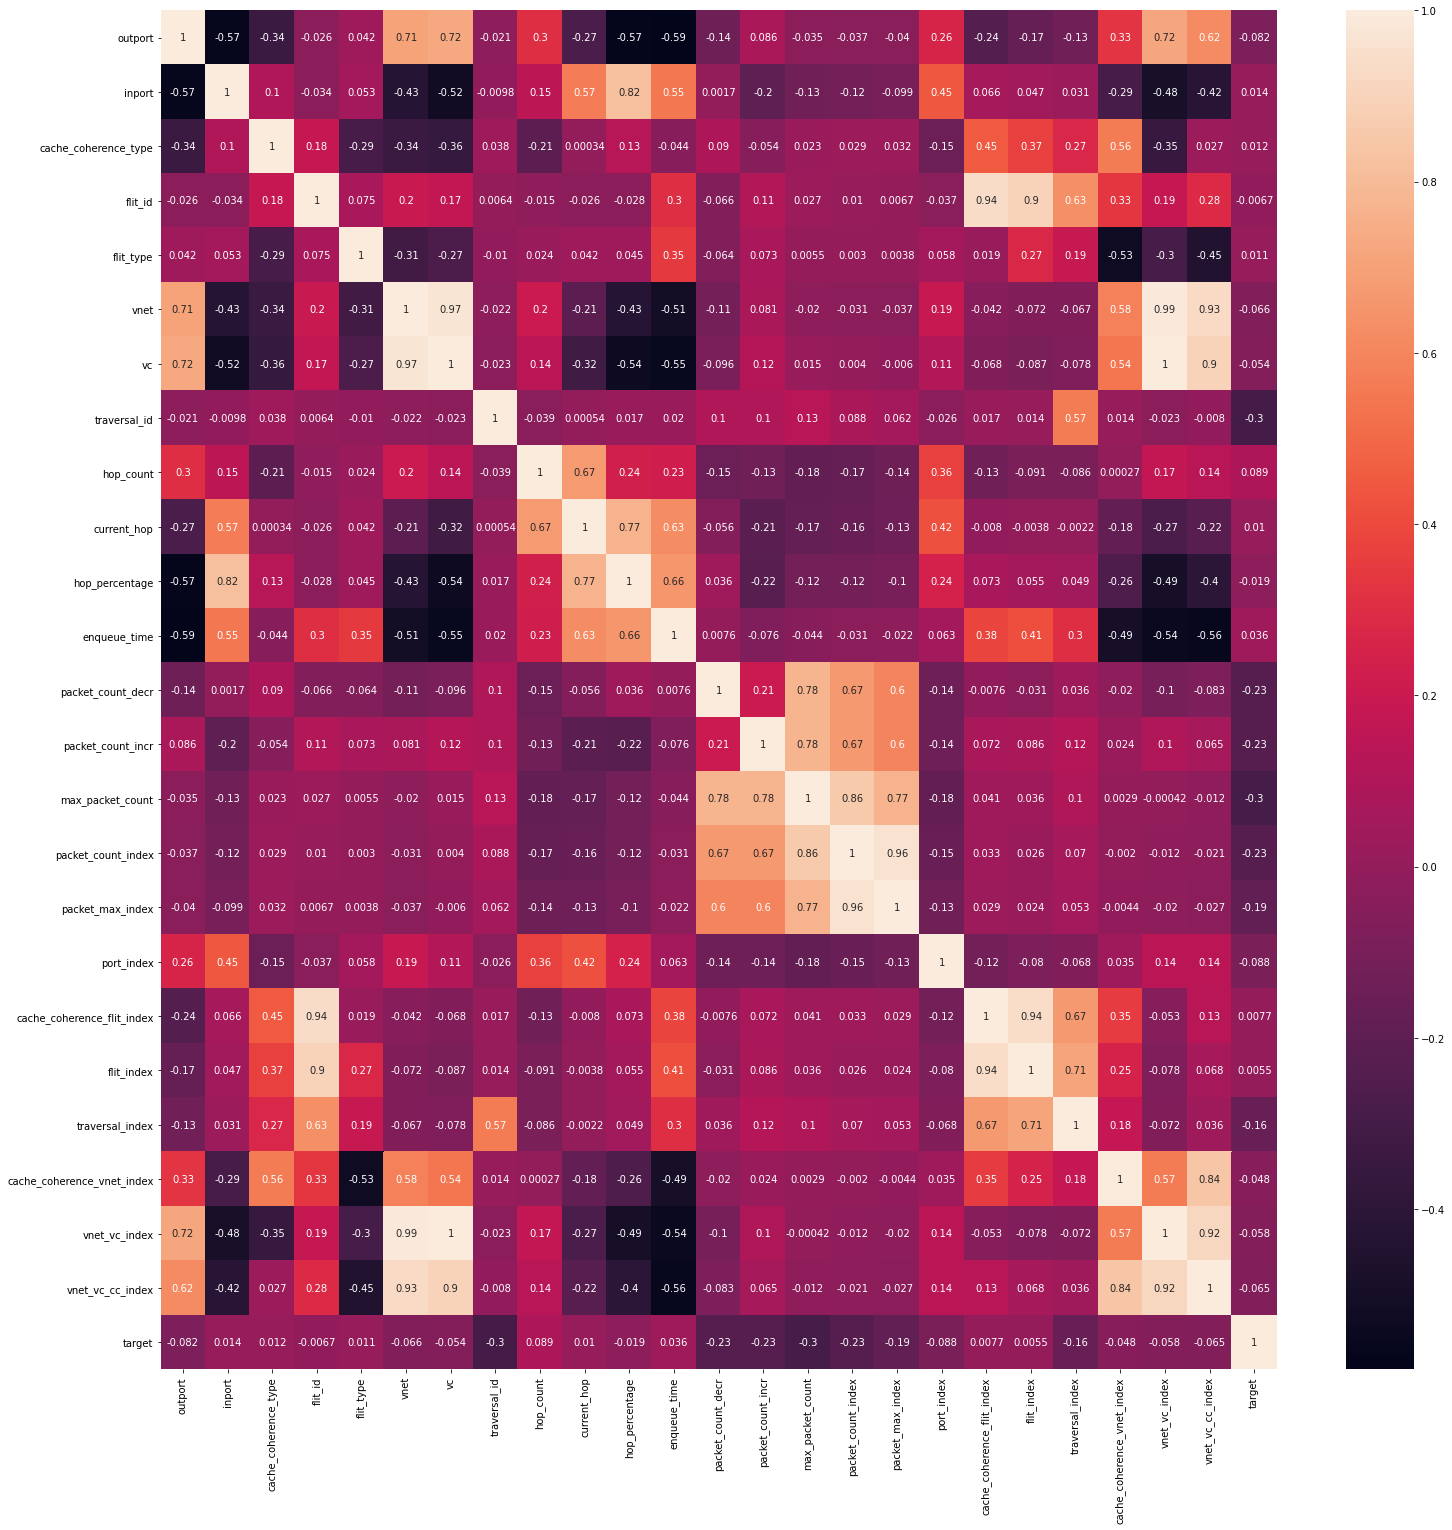

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [15]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0,3,1,1,4,3,9,2,1,1,1.0,8,12,1,12,12,144,0,1,4,8,3,27,9
1,0,3,1,1,4,3,9,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9
2,0,3,1,1,4,3,9,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9
3,0,3,1,1,4,3,9,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9
4,0,3,1,1,4,3,9,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517275,1,0,4,2,2,5,17,20060,2,0,0.0,5,5,5,9,25,225,0,8,16,320960,20,85,100
517276,1,0,4,3,2,5,17,20060,2,0,0.0,6,4,6,9,24,216,0,12,24,481440,20,85,100
517277,4,0,3,1,4,3,9,20060,1,0,0.0,7,3,7,9,21,189,0,3,12,240720,9,27,27
517278,1,0,4,4,2,5,17,20060,2,0,0.0,8,2,8,9,16,144,0,16,32,641920,20,85,100


In [16]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.2,1.0,0.058824,0.289474,0.000000,0.289474,0.027569,0.009167,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.2,1.0,0.058824,0.421053,0.000000,0.421053,0.040100,0.018463,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.2,1.0,0.058824,0.421053,0.000000,0.421053,0.040100,0.018463,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.166667,0.2,1.0,0.058824,0.421053,0.000000,0.421053,0.040100,0.018463,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
4,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.2,1.0,0.058824,0.421053,0.000000,0.421053,0.040100,0.018463,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517275,0.25,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.666589,0.333333,0.0,0.0,0.014706,0.105263,0.105263,0.210526,0.060150,0.014360,0.0,0.241379,0.139535,0.118517,0.944444,0.794521,1.000000
517276,0.25,0.00,0.500000,0.50,0.333333,1.0,0.727273,0.666589,0.333333,0.0,0.0,0.029412,0.078947,0.131579,0.210526,0.057644,0.013783,0.0,0.379310,0.232558,0.177777,0.944444,0.794521,1.000000
517277,1.00,0.00,0.333333,0.00,1.000000,0.0,0.000000,0.666589,0.166667,0.0,0.0,0.044118,0.052632,0.157895,0.210526,0.050125,0.012052,0.0,0.068966,0.093023,0.088888,0.333333,0.000000,0.197802
517278,0.25,0.00,0.500000,0.75,0.333333,1.0,0.727273,0.666589,0.333333,0.0,0.0,0.058824,0.026316,0.184211,0.210526,0.037594,0.009167,0.0,0.517241,0.325581,0.237036,0.944444,0.794521,1.000000


In [17]:
train_X[train_X.duplicated()].shape

(9602, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [19]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.166667,0.2,1.0,0.058824,0.444444,0.000000,0.444444,0.044444,0.021563,0.00,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
1,0.00,0.75,0.000000,0.00,1.000000,0.0,0.090909,0.000033,0.333333,0.4,1.0,0.117647,0.416667,0.027778,0.444444,0.086111,0.040656,0.00,0.000000,0.000000,0.000001,0.000000,0.041096,0.000000
2,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.0,0.235294,0.388889,0.055556,0.444444,0.122222,0.057203,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.75,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000067,0.166667,0.0,0.0,0.000000,0.361111,0.083333,0.444444,0.152778,0.071204,0.00,0.103448,0.000000,0.000003,0.944444,0.794521,1.000000
4,0.75,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000067,0.166667,0.0,0.0,0.014706,0.333333,0.111111,0.444444,0.177778,0.082659,0.00,0.241379,0.139535,0.000016,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81525,0.75,0.00,0.500000,1.00,0.666667,1.0,0.909091,0.999967,0.166667,0.0,0.0,0.117647,0.000000,0.305556,0.305556,0.030556,0.010707,0.00,0.655172,0.651163,0.666688,0.944444,0.931507,1.000000
81526,0.25,0.75,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.333333,0.2,0.5,0.058824,0.083333,0.000000,0.083333,0.008333,0.001123,0.25,0.137931,0.011628,0.055558,0.666667,0.000000,0.395604
81527,0.25,0.75,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.333333,0.2,0.5,0.161765,0.055556,0.027778,0.083333,0.013889,0.001722,0.25,0.310345,0.186047,0.222236,0.666667,0.000000,0.395604
81528,0.25,0.75,0.666667,0.50,0.333333,0.0,0.000000,1.000000,0.333333,0.2,0.5,0.264706,0.027778,0.055556,0.083333,0.013889,0.001722,0.25,0.482759,0.302326,0.333355,0.666667,0.000000,0.395604


In [20]:
test_X[test_X.duplicated()].shape

(30, 24)

In [21]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(10, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.2,1.00,0.058824,0.432432,0.000000,0.432432,0.042216,0.019946,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.00,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.333333,0.4,1.00,0.117647,0.405405,0.027027,0.432432,0.081794,0.037606,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
2,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.00,0.235294,0.378378,0.054054,0.432432,0.116095,0.052912,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.75,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000033,0.166667,0.0,0.00,0.000000,0.351351,0.081081,0.432432,0.145119,0.065863,0.0,0.103448,0.000000,0.000001,0.944444,0.794521,1.000000
4,0.75,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000033,0.166667,0.0,0.00,0.014706,0.324324,0.108108,0.432432,0.168865,0.076460,0.0,0.241379,0.139535,0.000010,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84583,0.75,1.00,0.500000,1.00,0.666667,1.0,0.727273,0.999967,0.666667,0.6,0.75,0.279412,0.000000,0.081081,0.081081,0.007916,0.001039,1.0,0.655172,0.651163,0.666777,0.944444,0.794521,1.000000
84584,0.00,1.00,0.833333,0.00,0.000000,0.0,0.000000,1.000000,0.166667,0.2,1.00,0.058824,0.081081,0.000000,0.081081,0.007916,0.001039,0.0,0.172414,0.023256,0.066679,0.833333,0.000000,0.494505
84585,0.00,1.00,0.833333,0.25,0.333333,0.0,0.000000,1.000000,0.166667,0.2,1.00,0.161765,0.054054,0.027027,0.081081,0.013193,0.001593,0.0,0.379310,0.232558,0.266719,0.833333,0.000000,0.494505
84586,0.00,1.00,0.833333,0.50,0.333333,0.0,0.000000,1.000000,0.166667,0.2,1.00,0.264706,0.027027,0.054054,0.081081,0.013193,0.001593,0.0,0.586207,0.372093,0.400079,0.833333,0.000000,0.494505


In [22]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(21, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.2,1.0,0.064516,0.432432,0.000000,0.432432,0.042216,0.019946,0.00,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.333333,0.4,1.0,0.129032,0.405405,0.027027,0.432432,0.081794,0.037606,0.00,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
2,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.0,0.258065,0.378378,0.054054,0.432432,0.116095,0.052912,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.75,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000033,0.166667,0.0,0.0,0.000000,0.351351,0.081081,0.432432,0.145119,0.065863,0.00,0.103448,0.000000,0.000001,0.944444,0.794521,1.000000
4,0.75,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000033,0.166667,0.0,0.0,0.016129,0.324324,0.108108,0.432432,0.168865,0.076460,0.00,0.241379,0.139535,0.000010,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80745,0.25,0.75,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.333333,0.2,0.5,0.290323,0.108108,0.054054,0.162162,0.036939,0.007203,0.25,0.482759,0.302326,0.333355,0.666667,0.000000,0.395604
80746,0.25,0.75,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.333333,0.2,0.5,0.403226,0.081081,0.081081,0.162162,0.039578,0.007688,0.25,0.655172,0.418605,0.444473,0.666667,0.000000,0.395604
80747,0.25,0.75,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.333333,0.2,0.5,0.516129,0.054054,0.108108,0.162162,0.036939,0.007203,0.25,0.827586,0.825581,0.833389,0.666667,0.000000,0.395604
80748,0.25,0.75,0.000000,0.00,1.000000,0.0,0.090909,1.000000,0.333333,0.2,0.5,0.516129,0.027027,0.135135,0.162162,0.029024,0.005748,0.25,0.000000,0.000000,0.044447,0.000000,0.041096,0.000000


In [23]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(27, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.2,1.0,0.059701,0.444444,0.000000,0.444444,0.044444,0.021563,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.0,0.238806,0.416667,0.027778,0.444444,0.086111,0.040656,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.833333,1.0,1.0,0.298507,0.388889,0.055556,0.444444,0.122222,0.057203,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
3,0.75,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000033,0.166667,0.0,0.0,0.000000,0.361111,0.083333,0.444444,0.152778,0.071204,0.0,0.103448,0.000000,0.000001,0.944444,0.794521,1.000000
4,0.75,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000033,0.166667,0.0,0.0,0.014925,0.333333,0.111111,0.444444,0.177778,0.082659,0.0,0.241379,0.139535,0.000010,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80551,1.00,0.00,0.500000,0.25,0.333333,1.0,0.727273,1.000000,0.833333,0.0,0.0,0.014925,0.111111,0.083333,0.194444,0.052778,0.011905,0.0,0.241379,0.139535,0.177782,0.944444,0.794521,1.000000
80552,1.00,0.00,0.500000,0.50,0.333333,1.0,0.727273,1.000000,0.833333,0.0,0.0,0.029851,0.083333,0.111111,0.194444,0.052778,0.011905,0.0,0.379310,0.232558,0.266674,0.944444,0.794521,1.000000
80553,1.00,0.00,0.500000,0.75,0.333333,1.0,0.727273,1.000000,0.833333,0.0,0.0,0.044776,0.055556,0.138889,0.194444,0.047222,0.010707,0.0,0.517241,0.325581,0.355566,0.944444,0.794521,1.000000
80554,1.00,0.00,0.333333,0.00,1.000000,0.0,0.090909,1.000000,0.166667,0.0,0.0,0.059701,0.027778,0.166667,0.194444,0.036111,0.008311,0.0,0.068966,0.093023,0.133336,0.333333,0.041096,0.197802


In [24]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(26, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.2,1.0,0.050633,0.421053,0.000000,0.421053,0.040100,0.018463,0.00,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.666667,0.8,1.0,0.202532,0.394737,0.026316,0.421053,0.077694,0.034810,0.00,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
2,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.0,0.215190,0.368421,0.052632,0.421053,0.110276,0.048977,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.75,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000033,0.166667,0.0,0.0,0.000000,0.342105,0.078947,0.421053,0.137845,0.060965,0.00,0.103448,0.000000,0.000001,0.944444,0.794521,1.000000
4,0.75,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000033,0.166667,0.0,0.0,0.012658,0.315789,0.105263,0.421053,0.160401,0.070774,0.00,0.241379,0.139535,0.000010,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80673,1.00,0.00,0.500000,0.75,0.333333,1.0,0.909091,0.999967,0.666667,0.0,0.0,0.037975,0.052632,0.131579,0.184211,0.042607,0.009167,0.00,0.517241,0.325581,0.355566,0.944444,0.931507,1.000000
80674,1.00,0.00,0.333333,0.00,1.000000,0.0,0.272727,0.999967,0.166667,0.0,0.0,0.050633,0.026316,0.157895,0.184211,0.032581,0.007116,0.00,0.068966,0.093023,0.133336,0.333333,0.123288,0.197802
80675,1.00,0.00,0.500000,1.00,0.666667,1.0,0.909091,0.999967,0.666667,0.0,0.0,0.088608,0.000000,0.184211,0.184211,0.017544,0.004039,0.00,0.655172,0.651163,0.666688,0.944444,0.931507,1.000000
80676,0.25,0.75,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.833333,0.8,0.8,0.202532,0.026316,0.000000,0.026316,0.002506,0.000192,0.25,0.137931,0.011628,0.055558,0.666667,0.000000,0.395604


In [25]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(18, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.0,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.2,1.0,0.065574,0.372093,0.000000,0.372093,0.031683,0.012936,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.0
1,0.00,0.25,0.0,0.00,1.000000,0.0,0.000000,0.000067,0.333333,0.4,1.0,0.131148,0.348837,0.023256,0.372093,0.061386,0.024390,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.0
2,0.00,0.75,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.0,0.262295,0.325581,0.046512,0.372093,0.087129,0.034317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.75,0.00,0.5,0.00,0.000000,1.0,0.727273,0.000033,0.166667,0.0,0.0,0.000000,0.302326,0.069767,0.372093,0.108911,0.042717,0.000000,0.103448,0.000000,0.000001,0.944444,0.794521,1.0
4,0.75,0.00,0.5,0.25,0.333333,1.0,0.727273,0.000033,0.166667,0.0,0.0,0.016393,0.279070,0.093023,0.372093,0.126733,0.049589,0.000000,0.241379,0.139535,0.000010,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91380,0.25,1.00,0.5,0.00,0.000000,1.0,0.727273,1.000000,0.833333,0.6,0.6,0.213115,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.103448,0.000000,0.044450,0.944444,0.794521,1.0
91381,0.25,1.00,0.5,0.25,0.333333,1.0,0.727273,1.000000,0.833333,0.6,0.6,0.229508,0.069767,0.000000,0.069767,0.005941,0.000674,0.333333,0.241379,0.139535,0.177806,0.944444,0.794521,1.0
91382,0.25,1.00,0.5,0.50,0.333333,1.0,0.727273,1.000000,0.833333,0.6,0.6,0.245902,0.046512,0.023256,0.069767,0.009901,0.001033,0.333333,0.379310,0.232558,0.266710,0.944444,0.794521,1.0
91383,0.25,1.00,0.5,0.75,0.333333,1.0,0.727273,1.000000,0.833333,0.6,0.6,0.262295,0.023256,0.046512,0.069767,0.009901,0.001033,0.333333,0.517241,0.325581,0.355614,0.944444,0.794521,1.0


In [26]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(70, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.00005,0.333333,0.5,1.0,0.125000,0.44,0.00,0.44,0.060773,0.030226,0.00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
1,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.00000,0.666667,1.0,1.0,0.250000,0.40,0.04,0.44,0.116022,0.055591,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.00,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.00005,0.333333,0.0,0.0,0.000000,0.36,0.08,0.44,0.160221,0.075882,0.00,0.103448,0.000000,0.000002,0.944444,0.794521,1.000000
3,1.00,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.00005,0.333333,0.0,0.0,0.015625,0.32,0.12,0.44,0.193370,0.091101,0.00,0.241379,0.139535,0.000016,0.944444,0.794521,1.000000
4,1.00,0.00,0.500000,0.50,0.333333,1.0,0.727273,0.00005,0.333333,0.0,0.0,0.031250,0.28,0.16,0.44,0.215470,0.101247,0.00,0.379310,0.232558,0.000024,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37681,0.25,0.75,0.666667,0.25,0.333333,0.0,0.000000,0.99995,0.833333,1.0,0.8,0.359375,0.16,0.00,0.16,0.022099,0.005073,0.25,0.310345,0.186047,0.222243,0.666667,0.000000,0.395604
37682,0.25,0.75,0.666667,0.50,0.333333,0.0,0.000000,0.99995,0.833333,1.0,0.8,0.468750,0.12,0.04,0.16,0.038674,0.008244,0.25,0.482759,0.302326,0.333365,0.666667,0.000000,0.395604
37683,0.25,0.75,0.666667,0.75,0.333333,0.0,0.000000,0.99995,0.833333,1.0,0.8,0.578125,0.08,0.08,0.16,0.044199,0.009300,0.25,0.655172,0.418605,0.444488,0.666667,0.000000,0.395604
37684,0.25,0.75,0.666667,1.00,0.666667,0.0,0.000000,0.99995,0.833333,1.0,0.8,0.687500,0.04,0.12,0.16,0.038674,0.008244,0.25,0.827586,0.825581,0.833416,0.666667,0.000000,0.395604


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [28]:
train_Y = df['target']
train_Y.value_counts()

0    327391
1    189889
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  7772.926317
7                 traversal_id  6277.954896
13           packet_count_incr  3893.820196
12           packet_count_decr  3879.113965
15          packet_count_index  3094.565116
20             traversal_index  1978.600886
16            packet_max_index  1840.530868
17                  port_index  1655.284007
5                         vnet  1027.865968
0                      outport   911.765000
22               vnet_vc_index   638.283605
6                           vc   492.838811
8                    hop_count   456.579839
23            vnet_vc_cc_index   296.830626
21  cache_coherence_vnet_index    77.770828
11                enqueue_time    73.109399
10              hop_percentage    45.774292


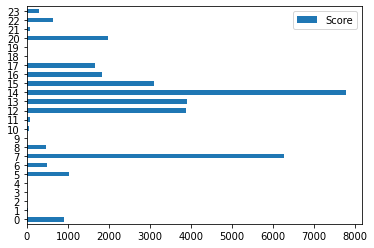

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 73.29903533869471
Test Prediction  73.30845963501392


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  83.64773702931436


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  84.69168203527687


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  85.48606811145511


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  81.53830875415859


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  81.42864225687299


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  77.83771953821743


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  29.644960993472374


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
8,hop_count,3.436348
18,cache_coherence_flit_index,2.965462
6,vc,1.398026
15,packet_count_index,1.355972
4,flit_type,0.598938
5,vnet,-0.073005
20,traversal_index,-0.216291
1,inport,-0.225548
23,vnet_vc_cc_index,-0.258512
19,flit_index,-0.274575


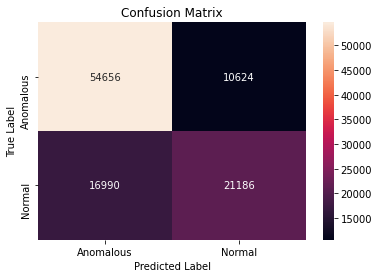

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80     65280
           1       0.67      0.55      0.61     38176

    accuracy                           0.73    103456
   macro avg       0.71      0.70      0.70    103456
weighted avg       0.73      0.73      0.73    103456



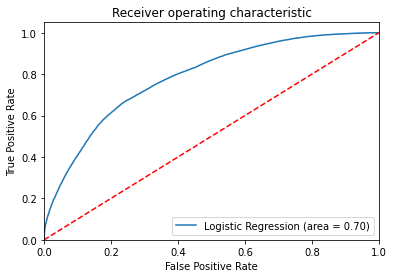

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

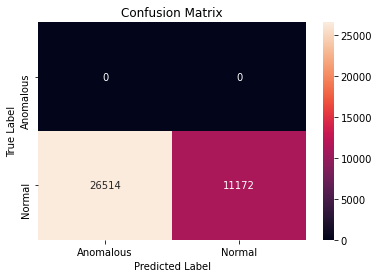

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.30      0.46     37686

    accuracy                           0.30     37686
   macro avg       0.50      0.15      0.23     37686
weighted avg       1.00      0.30      0.46     37686



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 88.99073035879988
Test Prediction  83.54566192390969


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  84.45848154053722


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  77.72615501016693


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  80.9077399380805


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  80.85927801777646


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  88.22479486353157


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  67.40821797888056


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  50.81727962638646


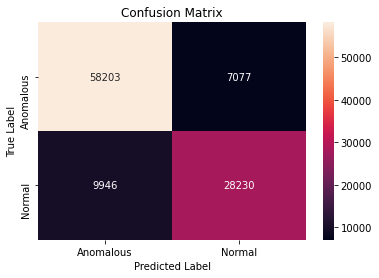

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     65280
           1       0.80      0.74      0.77     38176

    accuracy                           0.84    103456
   macro avg       0.83      0.82      0.82    103456
weighted avg       0.83      0.84      0.83    103456



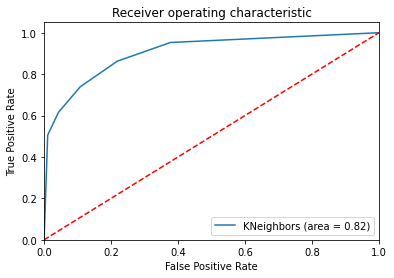

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

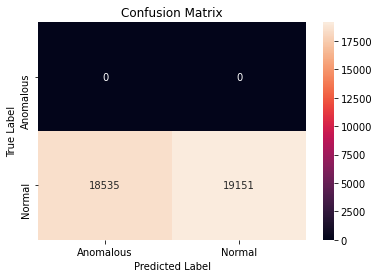

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.51      0.67     37686

    accuracy                           0.51     37686
   macro avg       0.50      0.25      0.34     37686
weighted avg       1.00      0.51      0.67     37686



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 62.532380915558306
Test Prediction Score 62.751314568512214


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 52.92530356923832


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  52.33602875112309


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  51.04643962848298


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  51.521922637668204


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  50.99283571729592


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  47.56469880177272


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  75.03051531072546


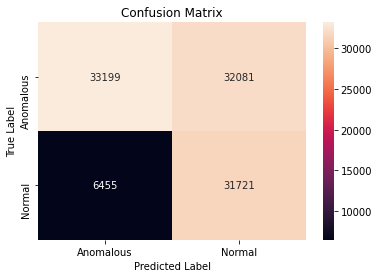

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.51      0.63     65280
           1       0.50      0.83      0.62     38176

    accuracy                           0.63    103456
   macro avg       0.67      0.67      0.63    103456
weighted avg       0.71      0.63      0.63    103456



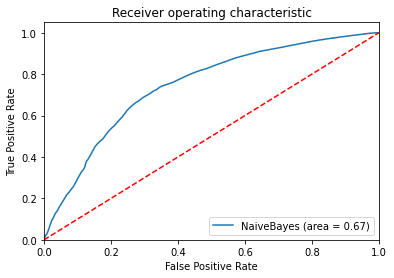

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [31]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 331059 samples, validate on 82765 samples
Epoch 1/10
331059/331059 [==============================] - 13s 40us/step - loss: 0.1826 - accuracy: 0.7240 - val_loss: 0.1734 - val_accuracy: 0.7475
Epoch 2/10
331059/331059 [==============================] - 13s 39us/step - loss: 0.1735 - accuracy: 0.7457 - val_loss: 0.1725 - val_accuracy: 0.7464
Epoch 3/10
331059/331059 [==============================] - 13s 40us/step - loss: 0.1726 - accuracy: 0.7454 - val_loss: 0.1715 - val_accuracy: 0.7470
Epoch 4/10
331059/331059 [==============================] - 13s 40us/step - loss: 0.1722 - accuracy: 0.7458 - val_loss: 0.1713 - val_accuracy: 0.7474
Epoch 5/10
331059/331059 [==============================] - 13s 39us/step - loss: 0.1721 - accuracy: 0.7458 - val_loss: 0.1715 - val_accuracy: 0.7456
Epoch 6/10
331059/331059 [==============================] - 12s 38us/step - loss: 0.1720 - accuracy: 0.7460 - val_loss: 0.1709 - val_accuracy: 0.7477
Epoch 7/10
331059/331059 [=======================

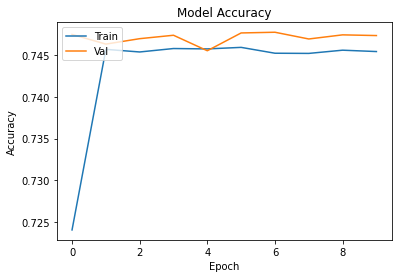

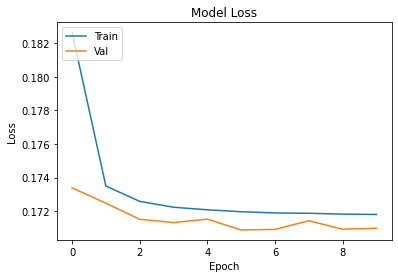

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.46%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.03%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.45%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.18%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.25%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.07%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.56%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 40.65%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 331059 samples, validate on 82765 samples
Epoch 1/30
331059/331059 [==============================] - 12s 37us/step - loss: 0.2088 - accuracy: 0.6617 - val_loss: 0.1837 - val_accuracy: 0.7289
Epoch 2/30
331059/331059 [==============================] - 12s 37us/step - loss: 0.1810 - accuracy: 0.7332 - val_loss: 0.1788 - val_accuracy: 0.7377
Epoch 3/30
331059/331059 [==============================] - 12s 37us/step - loss: 0.1790 - accuracy: 0.7356 - val_loss: 0.1774 - val_accuracy: 0.7388
Epoch 4/30
331059/331059 [==============================] - 12s 36us/step - loss: 0.1778 - accuracy: 0.7366 - val_loss: 0.1762 - val_accuracy: 0.7398
Epoch 5/30
331059/331059 [==============================] - 12s 37us/step - loss: 0.1767 - accuracy: 0.7380 - val_loss: 0.1752 - val_accuracy: 0.7432
Epoch 6/30
331059/331059 [==============================] - 12s 37us/step - loss: 0.1758 - accuracy: 0.7398 - val_loss: 0.1742 - val_accuracy: 0.7452
Epoch 7/30
331059/331059 [=======================

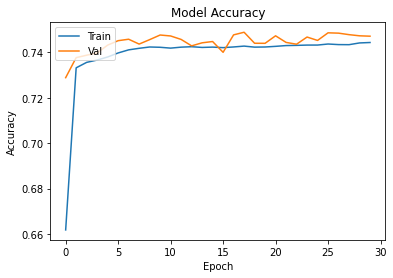

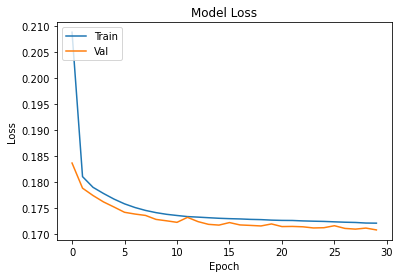

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.44%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.93%
accuracy: 85.16%
accuracy: 84.49%
accuracy: 79.73%
accuracy: 82.02%
accuracy: 71.78%
accuracy: 43.75%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 331059 samples, validate on 82765 samples
Epoch 1/30
331059/331059 [==============================] - 13s 38us/step - loss: 0.2277 - accuracy: 0.6385 - val_loss: 0.2071 - val_accuracy: 0.6900
Epoch 2/30
331059/331059 [==============================] - 12s 37us/step - loss: 0.1861 - accuracy: 0.7318 - val_loss: 0.1766 - val_accuracy: 0.7434
Epoch 3/30
331059/331059 [==============================] - 12s 37us/step - loss: 0.1754 - accuracy: 0.7426 - val_loss: 0.1725 - val_accuracy: 0.7496
Epoch 4/30
331059/331059 [==============================] - 12s 37us/step - loss: 0.1726 - accuracy: 0.7451 - val_loss: 0.1710 - val_accuracy: 0.7488
Epoch 5/30
331059/331059 [==============================] - 13s 38us/step - loss: 0.1713 - accuracy: 0.7461 - val_loss: 0.1703 - val_accuracy: 0.7474
Epoch 6/30
331059/331059 [==============================] - 13s 39us/step - loss: 0.1705 - accuracy: 0.7470 - val_loss: 0.1693 - val_accuracy: 0.7500
Epoch 7/30
331059/331059 [=======================

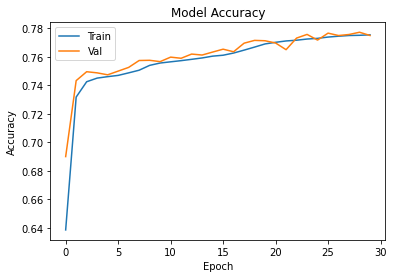

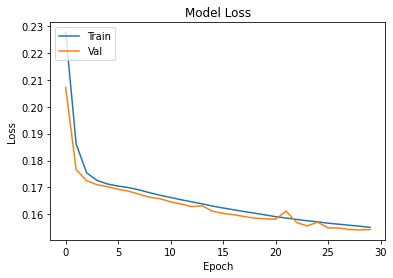

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.26%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.27%
accuracy: 80.69%
accuracy: 80.32%
accuracy: 77.64%
accuracy: 81.79%
accuracy: 65.74%
accuracy: 46.82%


5-Layer Neural Network Optimized

In [33]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 331059 samples, validate on 82765 samples
Epoch 1/100
331059/331059 [==============================] - 20s 61us/step - loss: 0.1652 - accuracy: 0.7540 - val_loss: 0.1530 - val_accuracy: 0.7808
Epoch 2/100
331059/331059 [==============================] - 20s 60us/step - loss: 0.1552 - accuracy: 0.7728 - val_loss: 0.1480 - val_accuracy: 0.7829
Epoch 3/100
331059/331059 [==============================] - 20s 61us/step - loss: 0.1504 - accuracy: 0.7804 - val_loss: 0.1426 - val_accuracy: 0.7901
Epoch 4/100
331059/331059 [==============================] - 20s 61us/step - loss: 0.1472 - accuracy: 0.7852 - val_loss: 0.1376 - val_accuracy: 0.7944
Epoch 5/100
331059/331059 [==============================] - 20s 61us/step - loss: 0.1448 - accuracy: 0.7884 - val_loss: 0.1373 - val_accuracy: 0.7942
Epoch 6/100
331059/331059 [==============================] - 20s 61us/step - loss: 0.1432 - accuracy: 0.7895 - val_loss: 0.1338 - val_accuracy: 0.7982
Epoch 7/100
331059/331059 [================

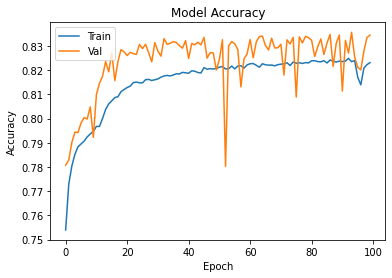

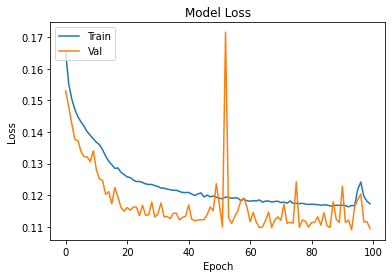

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [35]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.39%


In [36]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.25%
accuracy: 72.46%
accuracy: 73.59%
accuracy: 76.62%
accuracy: 81.37%
accuracy: 67.13%
accuracy: 63.38%


In [37]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 331059 samples, validate on 82765 samples
Epoch 1/50
331059/331059 [==============================] - 23s 69us/step - loss: 0.1659 - accuracy: 0.7506 - val_loss: 0.1554 - val_accuracy: 0.7656
Epoch 2/50
331059/331059 [==============================] - 22s 65us/step - loss: 0.1525 - accuracy: 0.7756 - val_loss: 0.1463 - val_accuracy: 0.7866
Epoch 3/50
331059/331059 [==============================] - 25s 75us/step - loss: 0.1459 - accuracy: 0.7864 - val_loss: 0.1376 - val_accuracy: 0.7969
Epoch 4/50
331059/331059 [==============================] - 22s 66us/step - loss: 0.1427 - accuracy: 0.7905 - val_loss: 0.1351 - val_accuracy: 0.7975
Epoch 5/50
331059/331059 [==============================] - 22s 65us/step - loss: 0.1408 - accuracy: 0.7916 - val_loss: 0.1357 - val_accuracy: 0.7948
Epoch 6/50
331059/331059 [==============================] - 22s 66us/step - loss: 0.1389 - accuracy: 0.7941 - val_loss: 0.1299 - val_accuracy: 0.8111
Epoch 7/50
331059/331059 [=======================

In [38]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.28%


In [39]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.91%
accuracy: 78.30%
accuracy: 79.43%
accuracy: 81.28%
accuracy: 84.82%
accuracy: 73.39%
accuracy: 60.67%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [43]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.99509936591402
Test Prediction Score 93.19130838230745


In [44]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 87.75665399239544
Test Prediction Score 81.2975835815955
Test Prediction Score 83.42167182662538
Test Prediction Score 84.41332737474552
Test Prediction Score 88.3177570093458
Test Prediction Score 78.95387645674892
Test Prediction Score 42.67367192060712


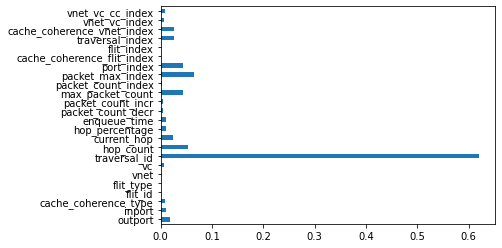

In [45]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

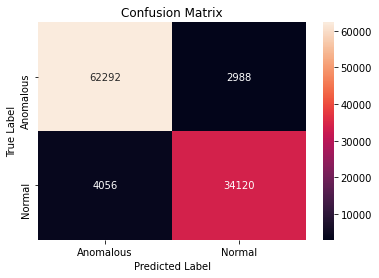

In [46]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     65280
           1       0.92      0.89      0.91     38176

    accuracy                           0.93    103456
   macro avg       0.93      0.92      0.93    103456
weighted avg       0.93      0.93      0.93    103456



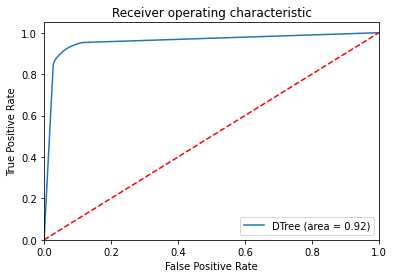

In [48]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [52]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.76928356016083
Test Prediction Score 93.87275750077328


In [53]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 89.78903471114927
Test Prediction Score 82.19250957582635
Test Prediction Score 84.86934984520124
Test Prediction Score 85.96380157902577
Test Prediction Score 89.91794541262797
Test Prediction Score 79.98030311320238
Test Prediction Score 43.42726742026217


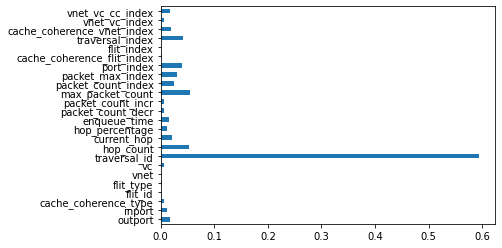

In [54]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

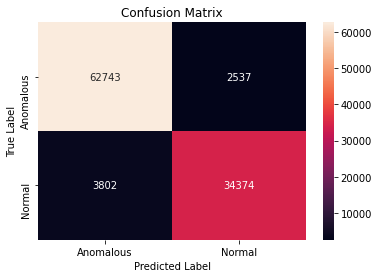

In [55]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [56]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     65280
           1       0.93      0.90      0.92     38176

    accuracy                           0.94    103456
   macro avg       0.94      0.93      0.93    103456
weighted avg       0.94      0.94      0.94    103456



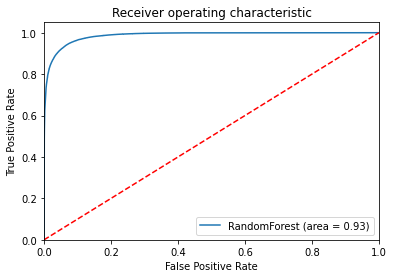

In [57]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [59]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [61]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.4393751933189
Test Prediction Score 95.82431178472007


In [62]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 87.84864467067337
Test Prediction Score 80.29507731593134
Test Prediction Score 83.35232198142415
Test Prediction Score 84.95580714037439
Test Prediction Score 90.1559285059124
Test Prediction Score 78.06423373639
Test Prediction Score 42.47996603513241


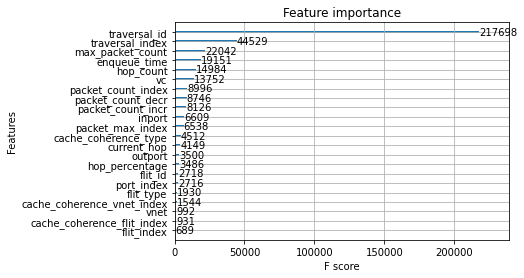

In [63]:
plot_importance(xgbc)
plt.show()

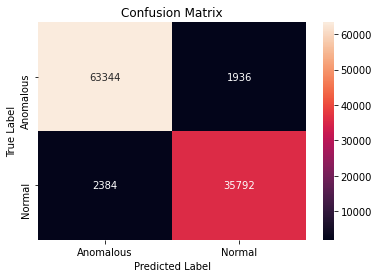

In [64]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [65]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     65280
           1       0.95      0.94      0.94     38176

    accuracy                           0.96    103456
   macro avg       0.96      0.95      0.96    103456
weighted avg       0.96      0.96      0.96    103456



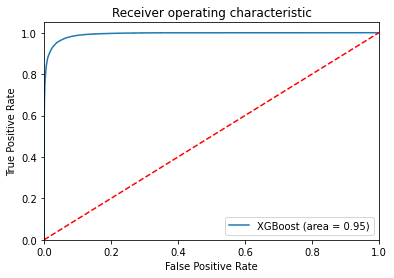

In [66]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [68]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [70]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 88.30952288895763
Test Prediction Score 87.34631147540983


In [71]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 83.91389672513185
Test Prediction Score 81.10488485364354
Test Prediction Score 83.29287925696595
Test Prediction Score 82.25954615422812
Test Prediction Score 88.67845013510498
Test Prediction Score 74.94008863599059
Test Prediction Score 51.0614021121902


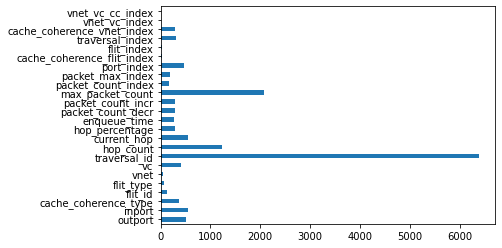

In [72]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

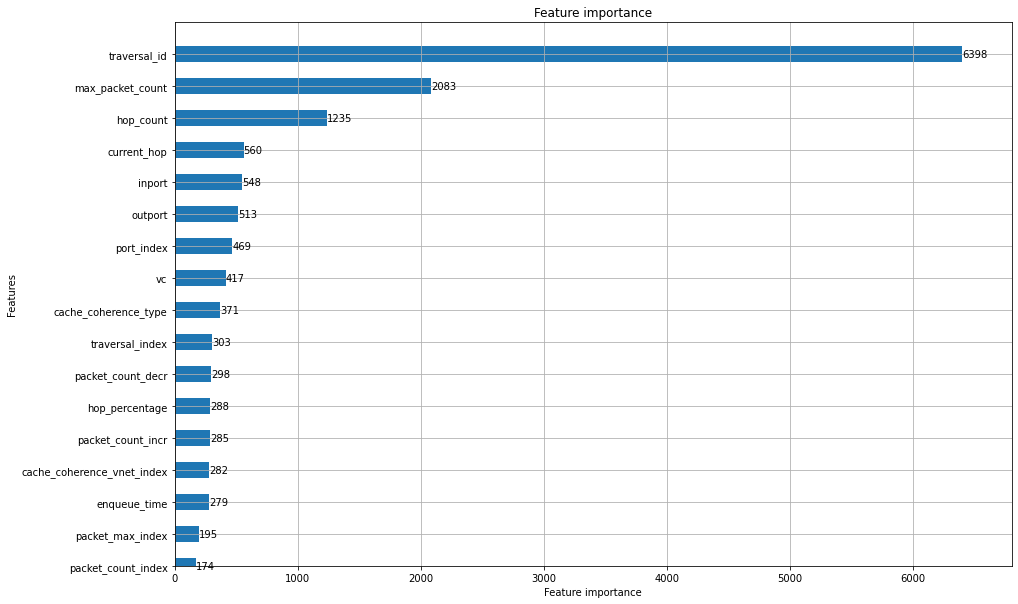

In [73]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [74]:
sorted(gbm.feature_importances_,reverse=True)

[6398,
 2083,
 1235,
 560,
 548,
 513,
 469,
 417,
 371,
 303,
 298,
 288,
 285,
 282,
 279,
 195,
 174,
 126,
 59,
 54,
 37,
 24,
 2,
 0]

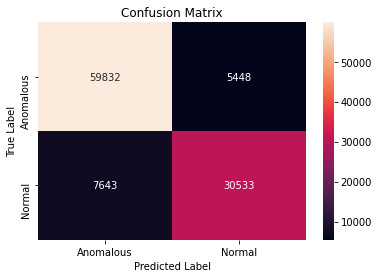

In [75]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [76]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     65280
           1       0.85      0.80      0.82     38176

    accuracy                           0.87    103456
   macro avg       0.87      0.86      0.86    103456
weighted avg       0.87      0.87      0.87    103456



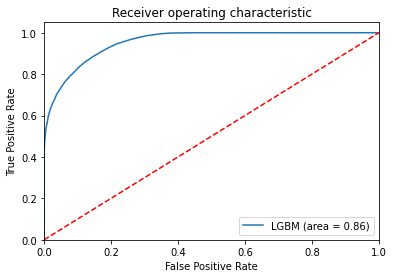

In [77]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()